# **Lista 4** 
### Rafał Głodek
***

### **Zadanie 1**

Na początku wprowadzamy klasę LinkedStack z wykładu

In [3]:
class Empty(Exception):
    pass
class LinkedStack:
 #--- -Node class- ---
    class _Node:
        __slots__ = '_element', '_next' #faster memory access

        def __init__(self,element,next):
            self._element = element
            self._next = next

 #--- -Stack methods- ---
    def __init__(self): #empty stack
        self._head = None
        self._size = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def push(self,e):
        self._head = self._Node(e,self._head)
        self._size += 1

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        return self._head._element

    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        return answer
    

Tworzymy funkcję stoper do liczenia czasu

In [1]:
import time
import numpy as np 

def stoper(liczba_pomiarow):
    """
    Function
    Funkcja obliczająca czas wykonania wszystkich metod LinkedStack dla różnych długości stosów

    Input
    liczba_pomiarow(integer) - liczba pomiarów wykonana dla każdej metody, na każdej długości stosu

    Output
    (push_time, is_empty_time, len_time, top_time, pop_time)(tuple) - krotka zawierająca listy obliczonych czasów dla każdej z metod
    
    """
    ns = np.linspace(10**5, 10**6, 10)
    push_time = []
    is_empty_time = []
    len_time = []
    top_time = []
    pop_time = []
    s = LinkedStack()
    while len(s) <= 10**6:
        s.push(1)
        if len(s) in ns:
            push_sum = 0
            is_empty_sum = 0
            len_sum = 0
            top_sum = 0
            pop_sum = 0
            for j in range(liczba_pomiarow):
                start_push = time.time()
                s.push(1)
                end_push = time.time()
                s.pop()
                push_sum += end_push-start_push
                start_is_empty = time.time()
                s.is_empty()
                end_is_empty = time.time()
                is_empty_sum += end_is_empty-start_is_empty
                start_len = time.time()
                len(s)
                end_len = time.time()
                len_sum += end_len-start_len
                start_top = time.time()
                s.top()
                end_top = time.time()
                top_sum += end_top-start_top
                start_pop = time.time()
                s.pop()
                end_pop = time.time()
                pop_sum += end_pop-start_pop
                s.push(1)
            push_time.append((push_sum)/liczba_pomiarow)
            is_empty_time.append((is_empty_sum)/liczba_pomiarow)
            len_time.append((len_sum)/liczba_pomiarow)
            top_time.append((top_sum)/liczba_pomiarow)
            pop_time.append((pop_sum)/liczba_pomiarow)

    return push_time, is_empty_time, len_time, top_time, pop_time


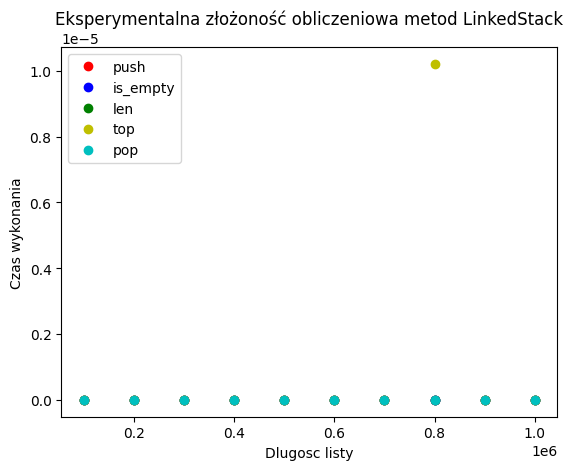

In [6]:

import matplotlib.pyplot as plt
xs = np.linspace(10**5, 10**6, 10)
push_time, is_empty_time, len_time, top_time, pop_time = stoper(100)
plt.plot(xs, push_time, "ro", label="push")
plt.plot(xs, is_empty_time, "bo", label="is_empty")
plt.plot(xs, len_time, "go", label = "len")
plt.plot(xs, top_time, "yo", label = "top")
plt.plot(xs, pop_time, "co", label = "pop")
plt.xlabel("Dlugosc listy")
plt.legend(loc="best")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa metod LinkedStack")
plt.show()


### **Zadanie 2**

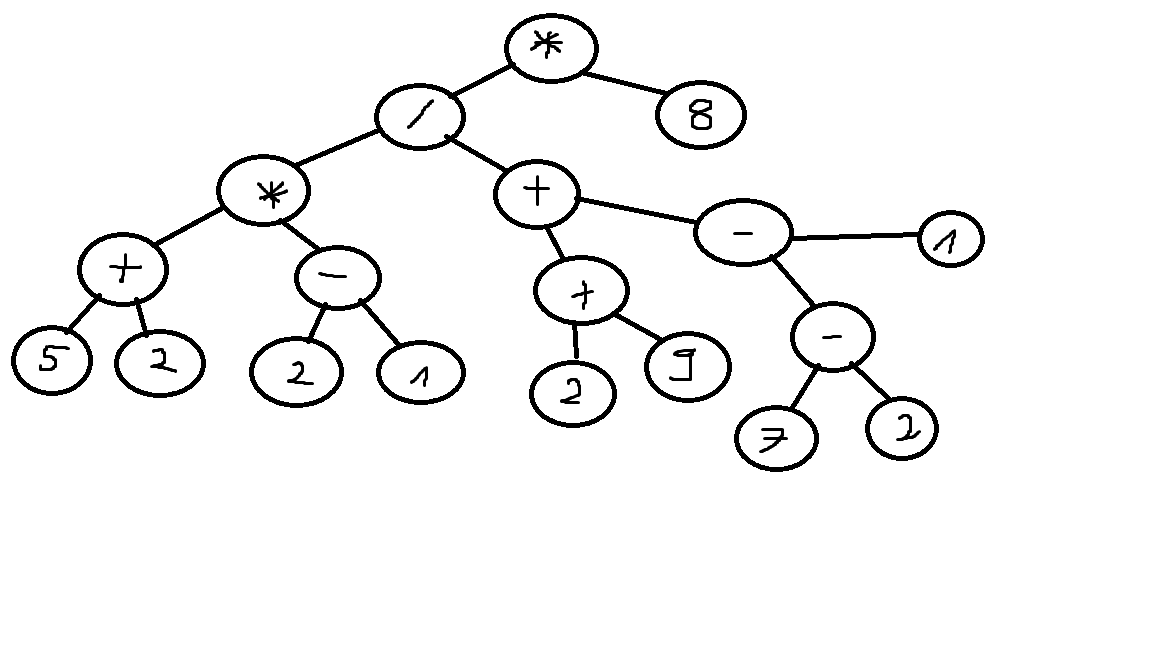

In [23]:
from PIL import Image
from IPython.display import display
img = Image.open("drzewo3.png")
display(img)

### **Zadanie 3**

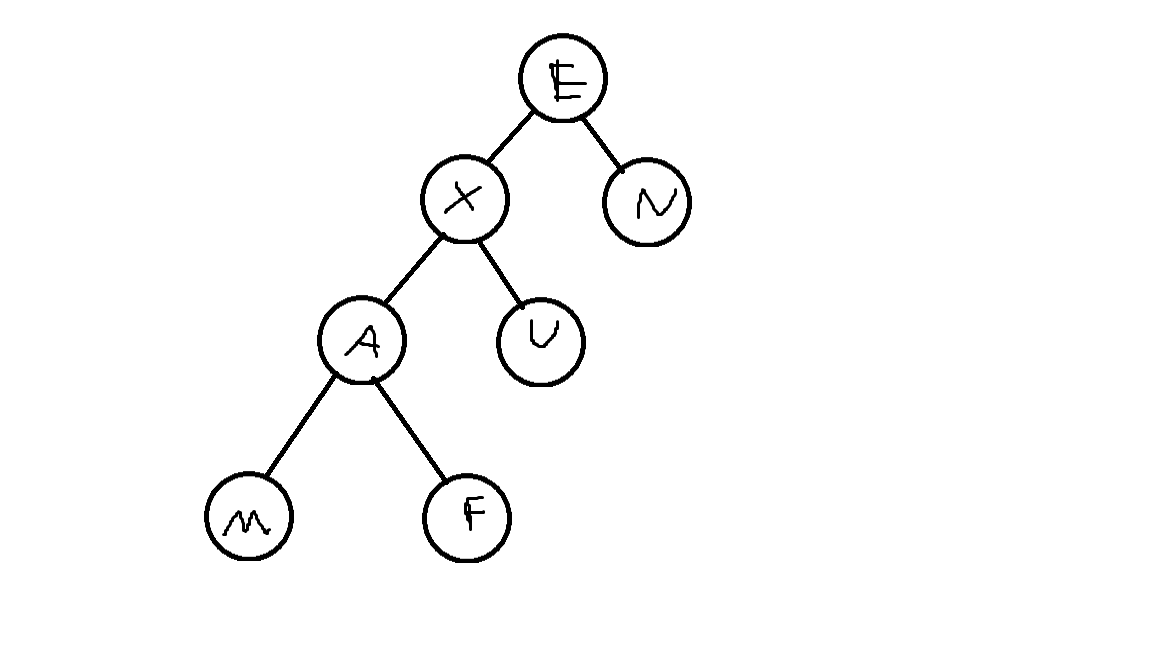

In [2]:
img2 = Image.open("drzewo2.png")
display(img2)

### **Zadanie 4**

Tworzymy wyjątki, gdyby wystąpił błąd

In [7]:
class RootError(Exception): #błąd, jeśli root nie istnieje
    pass

class ChildError(Exception): #błąd, jeśli dziecko nie istnieje
    pass

class ParentError(Exception): #błąd, jeśli rodzic nie istnieje
    pass

class NodeError(Exception): #błąd, jeśli node nie istnieje
    pass

Implementcja struktury drzewa binarnego za pomocą listy

In [8]:
class BinaryTreeUsingArray():
    """
    Class
    Klasa będąca implemetnacją struktury drzewa binarnego za pomocą listy 
    """


    def __init__(self):
        self.data = [None]  #na początku tylko root=None
        self.size = 0 #długość listy
        self.root = 0 #indeks root'a
        self.depth = 0 #głębokość drzewa

    def set_root(self, value): 
        """
        Function
        Metoda tworząca korzeń drzewa

        Input
        value(float) - wartość korzenia

        """
        if self.data[self.root] is not None:
            raise RootError("Root already exists")
        else:
            self.data[self.root] = value
        self.size += 1
        self.depth += 1
    
    def add_left_child(self, parent_index, child_value):
        """
        Function
        Funkcja dodająca lewe dziecko do rodzica

        Input
        parent_index(integer) - indeks rodzica
        child_value(integer) - wartość node'a, który będzie lewym dzieckiem

        """
        if self.data[parent_index] is None:
            raise ParentError("Parent doesn't exist")
        else:
            child_index = 2 * parent_index + 1
            if self.size == 1:
                self.data += [None] * 2
                self.depth += 1
            elif len(self.data) - 1 < child_index:
                self.data += [None] * 2 ** self.depth
                self.depth += 1
            if self.data[child_index] is not None:
                raise ChildError("Child already exists")
            else:
                self.data[child_index] = child_value
                self.size += 1
    
    def add_right_child(self, parent_index, child_value):
        """
        Function
        Funkcja dodająca prawe dziecko do rodzica

        Input
        parent_index(integer) - indeks rodzica
        child_value(integer) - wartość node'a, który będzie prawym dzieckiem
        
        """
        if self.data[parent_index] is None:
            raise ParentError("Parent doesn't exist")
        else:
            child_index = 2 * parent_index + 2
            if self.size == 1:
                self.data += [None] * 2
                self.depth += 1
            elif len(self.data) - 1 < child_index:
                self.data += [None] * 2 ** self.depth
                self.depth += 1
            if self.data[child_index] is not None:
                raise ChildError("Child already exists")
            else:
                self.data[child_index] = child_value
                self.size += 1

    def get_right_child(self, parent_index):
        """
        Function
        Funkcja zwracająca wartość prawego dziecka danego rodzica, o ile istnieje

        Input
        parent_index(integer) - indeks rodzica

        Output
        self.data[child_index](float) - wartość node'a, który jest prawym dzieckiem rodzica
        ChildError - jeśli dziecko nie istnieje
        """
        child_index = 2 * parent_index + 2
        if self.data[child_index] is None:
            raise ChildError("Child doesn't exists")
        else:
            return self.data[child_index]
    
    def get_left_child(self, parent_index):
        """
        Function
        Funkcja zwracająca wartość lewego dziecka danego rodzica, o ile istnieje

        Input
        parent_index(integer) - indeks rodzica

        Output
        self.data[child_index](float) - wartość node'a, który jest lewym dzieckiem rodzica
        ChildError - jeśli dziecko nie istnieje
        """
        child_index = 2 * parent_index + 1
        if self.data[child_index] is None:
            raise ChildError("Child doesn't exists")
        else:
            return self.data[child_index]
    
    def has_left_child(self, parent_index):
        """
        Function
        Funkcja sprawdzająca czy node o danym indeksie posiada lewe dziecko

        Input
        parent_index(integer) - indeks rodzica

        Output
        False(bool) - jeśli nie posiada lewego dziecka
        True(bool) - jeśli posiada lewe dziecko
        """
        child_index = 2 * parent_index + 1
        if child_index > len(self.data):
            return False
        else:
            if self.data[child_index] is None:
                return False
            else:
                return True
        
    def has_right_child(self, parent_index):
        """
        Function
        Funkcja sprawdzająca czy node o danym indeksie posiada prawe dziecko

        Input
        parent_index(integer) - indeks rodzica

        Output
        False(bool) - jeśli nie posiada prawego dziecka
        True(bool) - jeśli posiada prawego dziecko
        """
        child_index = 2 * parent_index + 2
        if child_index > len(self.data):
            return False
        else:
            if self.data[child_index] is None:
                return False
            else:
                return True
        
    def remove_node(self, index):
        """
        Function
        Funkcja usuwająca node'a o podanym indeksie i wszystkich jego potomków

        Input
        index(integer) - indeks node'a, którego chcemy usunąć
        """
        if index > len(self.data):
            raise IndexError("Nie istnieje node o podanym indeksie")
        elif self.data[index] == None:
            raise NodeError("Nie istnieje node o podanym indeksie")
        else:
            family = [index]
            cur_index = 0
            left_child_index = 2 * index + 1
            right_child_index = 2 * index + 2
            while left_child_index < len(self.data) - 1:
                family.append(left_child_index)
                family.append(right_child_index)
                cur_index += 1
                left_child_index = 2 * family[cur_index] + 1
                right_child_index = 2 * family[cur_index] + 2
            for i in family:
                self.data[i] = None
        
    def __str__(self):
        """
        Function
        Funkcja wyświetlająca drzewo w postaci listy

        Output
        str(self.data)(string) - lista reprezentująca drzewo
        """
        return str(self.data)
    




In [9]:
d = BinaryTreeUsingArray()
d.set_root(1)
d.add_left_child(0,2)
d.add_right_child(0,4)
d.add_left_child(1,6)
d.add_right_child(3,8)
d.remove_node(2)
print(d)
print(len(d.data))

[1, 2, None, 6, None, None, None, None, 8, None, None, None, None, None, None]
15


### **Zadanie 5**

Tworzymy podstawę pod budowanie struktury drzewa wyrażenia

In [11]:
class TreeNode:
    """
    Class
    Klasa opisująca pojedynczego node'a w drzewie wyrażenia
    """

    def __init__(self, value, left_child=None, right_child=None):
        self.value = value              # string, stored value
        self.left_child = left_child    # None or TreeNode instance
        self.right_child = right_child  # None or TreeNode instance

    def get_value(self):
        """
        Function 
        Funkcja zwracająca wartość node'a

        Output
        self.value(float) - wartość node'a

        """
        return self.value

    def add_left_child(self, value):
        """
        Function
        Funkcja dodająca lewe dziecko do node'a

        Input
        value(float) - wartość lewego dziecka
        """
        self.left_child = value

    def add_right_child(self, value):
        """
        Function
        Funkcja dodająca prawe dziecko do node'a

        Input
        value(float) - wartość prawego dziecka
        """
        self.right_child = value

    def get_left_child(self):
        """
        Function
        Funkcja zwracająca wartość lewego dziecka node'a

        Output
        self.left_child(float) - wartość lewego dziecka
        ChildError - jeśli dziecko nie istnieje
        """
        if self.has_left_child:
            return self.left_child
        else:
            raise ChildError("Left child doesn't exist")

    def get_right_child(self):
        """
        Function
        Funkcja zwracająca wartość prawego dziecka node'a

        Output
        self.left_child(float) - wartość prawego dziecka
        ChildError - jeśli dziecko nie istnieje
        """
        if self.has_right_child:
            return self.right_child
        else:
            raise ChildError("Right child doesn't exist")

    def has_left_child(self) -> bool:
        """
        Function
        Funkcja sprawdzająca czy node posiada lewe dziecko

        Output
        True(bool) - jeśli posiada lewe dziecko
        False(bool) - jeśli nie posiada lewego dziecka
        """
        if self.left_child is not None:
            return True
        else:
            return False

    def has_right_child(self) -> bool:
        """
        Function
        Funkcja sprawdzająca czy node posiada prawe dziecko

        Output
        True(bool) - jeśli posiada prawe dziecko
        False(bool) - jeśli nie posiada prawego dziecka
        """
        if self.right_child is not None:
            return True
        else:
            return False

    def is_leaf(self) -> bool:
        """
        Function
        Funkcja sprawdzająca czy node jest liściem

        Output
        True(bool) - jeśli jest liściem
        False(bool) - jeśli nie nie jest liściem
        """
        if self.has_left_child() or self.has_right_child():
            return False
        else:
            return True
        
    def __str__(self):
        """
        Function
        Funkcja wyświetlająca wyrażenie w postaci stringa
        
        """
        funcs = ['sin', 'cos', 'exp', 'log']
        ops = ['+', '-','*','/','^']
        if self.left_child is None:
            a = ""
        else:
            a = str(self.left_child)
        if self.right_child is None:
            b = ""
        else:
            b = str(self.right_child)
        if self.value in ops:
            return "("+a+str(self.value)+b+")"
        elif self.value in funcs:
            return str(self.value) + "(" + b + ")"
        else:
            return a+str(self.value)+b
    

Funkcja tokenizująca z wykładu

In [10]:
def tokenize(raw): #funkcja tokenizująca z wykładu
    """
    Function
    Funkcja tokenizująca wyrażenie podane w postaci stringa

    Input
    raw(string) - wyrażenie matematyczne

    Output
    tokens(list) - lista tokenów
    """
    raw = raw.replace(" ", "")
    SYMBOLS = set('+-*^/() ') # allow for '*' or 'x' for multiplication
    mark = 0
    tokens = []
    n = len(raw)
    for j in range(n):
        if raw[j] in SYMBOLS:
            if mark != j:
                tokens.append(raw[mark:j]) # complete preceding token
            if raw[j] != ' ':
                tokens.append(raw[j]) # include this token
            mark = j+1 # update mark to being at next index
    if mark != n:
        tokens.append(raw[mark:n]) # complete preceding token
    return tokens

Funkcja tworząca drzewo wyrażenia z tokenów

In [12]:
def build_expression_tree(tokens):
    """
    Function
    Funkcja tworząca rekurencyjną strukturę drzewa wyrażenia

    Input
    tokens(list) - lista tokenów, z których tworzymy drzewo

    Output
    S.pop()(obiekt klasy TreeNode) - korzeń drzewa wyrażenia
    """

    S = [] # we use Python list as stack
    funcs = ["sin", "cos", "exp", "log"]
    for t in tokens:
        if t in '+-*/^': # t is an operator symbol
            S.append(t) # push the operator symbol
        elif t not in '()': # consider t to be a literal
            if t in funcs:
                S.append(t)
            else:
                S.append(TreeNode(t)) # push trivial tree storing value
        elif t == ')': # compose a new tree from three constituent parts
            right = S.pop() # right subtree as per LIFO
            op = S.pop() # operator symbol
            if op in funcs:
                S.append(TreeNode(op, None, right))
            else:
                left = S.pop() # left subtree
                S.append(TreeNode(op, left, right)) # repush tree
            # we ignore a left parenthesis
    return S.pop()

In [13]:
def derivative_on_tree(tree, var):
    """
    Funkcja przetwarzająca drzewo wyrażenia w drzewo pochodnej

    Input
    tree(obiekt klasy TreeNode) - drzewo wyrażenia (rekurencyjnie)
    var(string) - zmienna, po której będziemy różniczkować

    Output
    new_tree(obiekt klasy TreeNode) - drzewo pochodnej wyrażenia (rekurencyjnie)
    """
    if tree.is_leaf():
        if tree.value == var:
            return "1"
        else:
            return "0"
    else:
        if tree.value == '*':
            new_tree = TreeNode("+")
            new_tree.add_left_child(TreeNode('*', derivative_on_tree(tree.get_left_child(), var), tree.get_right_child()))
            new_tree.add_right_child(TreeNode('*', tree.get_left_child(), derivative_on_tree(tree.get_right_child(), var)))
            return new_tree
        elif tree.value == "+":
            new_tree = TreeNode("+")
            new_tree.add_left_child(derivative_on_tree(tree.get_left_child(),var))
            new_tree.add_right_child(derivative_on_tree(tree.get_right_child(),var))
            return new_tree
        elif tree.value == "-":
            new_tree = TreeNode("-")
            new_tree.add_left_child(derivative_on_tree(tree.get_left_child(),var))
            new_tree.add_right_child(derivative_on_tree(tree.get_right_child(),var))
            return new_tree
        elif tree.value == "/":
            new_tree = TreeNode("/")
            new_tree.add_left_child(TreeNode("-", TreeNode("*", derivative_on_tree(tree.get_left_child(), var), tree.get_right_child()), TreeNode("*", tree.get_left_child(), derivative_on_tree(tree.get_right_child(), var))))
            new_tree.add_right_child(TreeNode("*", tree.get_right_child(), tree.get_right_child()))
            return new_tree
        elif tree.value == "^":
            new_tree = TreeNode("*")
            new_tree.add_left_child(derivative_on_tree(tree.get_left_child(),var))
            new_tree.add_right_child(TreeNode("*",tree.get_right_child(),TreeNode("^",tree.get_left_child(),TreeNode("-",tree.get_right_child(),"1"))))
            return new_tree
        elif tree.value == "sin":
            new_tree = TreeNode("*")
            new_tree.add_left_child(derivative_on_tree(tree.get_right_child(), var))
            new_tree.add_right_child(TreeNode("cos", None, tree.get_right_child()))
            return new_tree
        elif tree.value == "cos":
            new_tree = TreeNode("*")
            new_tree.add_left_child(derivative_on_tree(tree.get_right_child(), var))
            new_tree.add_right_child(TreeNode("*", TreeNode("-", "0", "1"), TreeNode("sin", None, tree.get_right_child())))
            return new_tree
        elif tree.value == "exp":
            new_tree = TreeNode("*")
            new_tree.add_left_child(derivative_on_tree(tree.get_right_child(),var))
            new_tree.add_right_child(TreeNode("exp",None,tree.get_right_child()))
            return new_tree
        elif tree.value == "log":
            new_tree = TreeNode("*")
            new_tree.add_left_child(derivative_on_tree(tree.get_right_child(),var))
            new_tree.add_right_child(TreeNode("/","1",tree.get_right_child()))
            return new_tree

In [14]:
def derivative(expression, var):
    """
    Funkcja wykorzystująca funkcję derivative_on_tree do obliczenia pochoodnej z wyrażenia

    Input
    expression(string) - wyrażenie matematyczne w postaci ciągu znaków
    var(string) - zmienna, po której będziemy różniczkować

    Output
    derivative_on_tree(tree, var)(string) - pochodna wyrażenia wyjściowego w postaci ciągu znaków
    """
    tokens = tokenize(expression)
    tree = build_expression_tree(tokens)
    return derivative_on_tree(tree, var)

In [15]:
print(derivative("cos(x)", "x"))

(1*((0-1)*sin(x)))
